In [28]:
sys.path.append("~/rankability_toolbox")
import pyrankability
from sensitivity_tests import *
import pandas as pd
from utilities import *

In [29]:
massey = MasseyRankingAlgorithm()

eloTournamentSmall = SynthELOTournamentSource(5, 5, 100, 800)
competitiveELOTournamentSmall = SynthELOTournamentSource(5, 3, 8, 800)
eloTournament = SynthELOTournamentSource(10, 5, 100, 800)
competitiveELOTournament = SynthELOTournamentSource(10, 3, 8, 800)
eloTournamentBig = SynthELOTournamentSource(20, 5, 100, 800)
competitiveELOTournamentBig = SynthELOTournamentSource(20, 3, 8, 800)



massey_ranks = {}
massey_ranks["small"] = []
massey_ranks["compsmall"] = []
massey_ranks["normal"] = []
massey_ranks["compnormal"] = []
massey_ranks["big"] = []
massey_ranks["compbig"] = []
P_sets = {}
P_sets["small"] = []
P_sets["compsmall"] = []
P_sets["normal"] = []
P_sets["compnormal"] = []
P_sets["big"] = []
P_sets["compbig"] = []
for i in range(1):
    eloMatrixSmall = eloTournamentSmall.init_D()
    compELOMatrixSmall = competitiveELOTournamentSmall.init_D()
    eloMatrix = eloTournament.init_D()
    compELOMatrix = competitiveELOTournament.init_D()
    eloMatrixBig = eloTournamentBig.init_D()
    compELOMatrixBig = competitiveELOTournamentBig.init_D()
    
    k, details = pyrankability.rank.solve(eloMatrixSmall, method="hillside", num_random_restarts=6, find_pair=True)
    P_sets["small"].append(list(set(details["P"])))
    massey_ranks["small"].append(massey.rank(eloMatrixSmall))
    
    k, details = pyrankability.rank.solve(compELOMatrixSmall, method="hillside", num_random_restarts=6, find_pair=True)
    P_sets["compsmall"].append(list(set(details["P"])))
    massey_ranks["compsmall"].append(massey.rank(compELOMatrixSmall))
    
    k, details = pyrankability.rank.solve(eloMatrix, method="hillside", num_random_restarts=12, find_pair=True)
    P_sets["normal"].append(list(set(details["P"])))
    massey_ranks["normal"].append(massey.rank(eloMatrix))
    
    k, details = pyrankability.rank.solve(compELOMatrix, method="hillside", num_random_restarts=12, find_pair=True)
    P_sets["compnormal"].append(list(set(details["P"])))
    massey_ranks["compnormal"].append(massey.rank(compELOMatrix))
    
    k, details = pyrankability.rank.solve(eloMatrixBig, method="hillside", num_random_restarts=20, find_pair=True)
    P_sets["big"].append(list(set(details["P"])))
    massey_ranks["big"].append(massey.rank(eloMatrixBig))
    
    k, details = pyrankability.rank.solve(compELOMatrixBig, method="hillside", num_random_restarts=20, find_pair=True)
    P_sets["compbig"].append(list(set(details["P"])))
    massey_ranks["compbig"].append(massey.rank(compELOMatrixBig))



Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hillside: 20 rows, 10 columns, 60 nonzeros
Read MPS format model from file /tmp/tmpypvct0vz/model.mps
Reading time = 0.00 seconds
hil

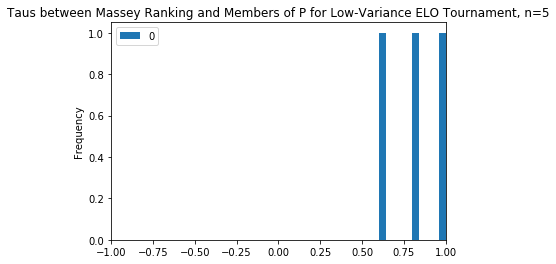

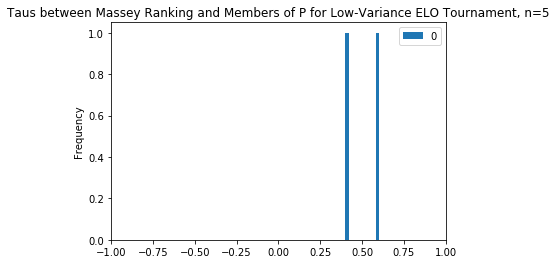

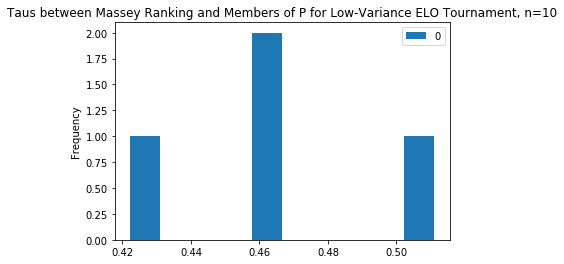

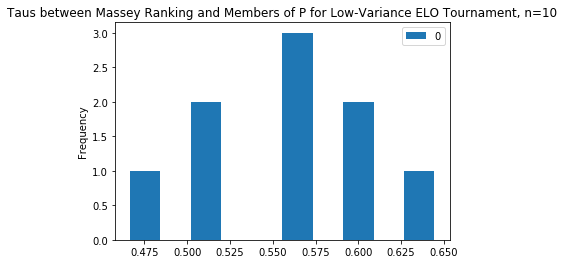

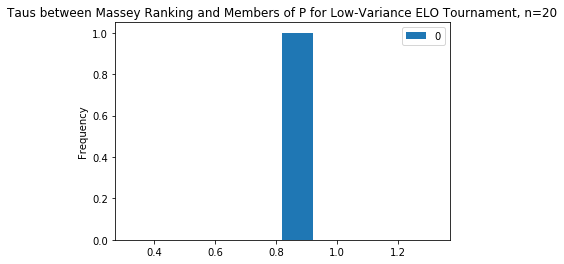

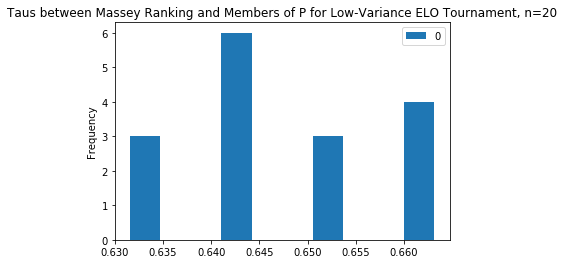

In [33]:
taus = {}
for j in massey_ranks.keys():
    taus[j] = []
    #print(j)
    #print(len(massey_ranks[j]))
    #print(len(P_sets[j]))
    #print(massey_ranks[j])
    #print(P_sets[j])
    for k in range(len(massey_ranks[j])):
        for o in range(len(P_sets[j][k])):
            taus[j].append(kendall_tau(massey_ranks[j][k], P_sets[j][k][o]))
#tausdf = pd.DataFrame(taus)
#tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")
taus
tausdfs = []
for q in taus.keys():
    tausdf = pd.DataFrame(taus[q])
    if "small" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=5", xlim=(-1,1))
    elif "big" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=20", xlim=(-1,1))
    else:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10", xlim=(-1,1)) 
    taudfs.append(tausdf)
    
#for i in range(len(taudfs)):
#        taudfs[i].to_csv("taudf" + str(i) + ".csv")

In [2]:
taus = {}
for j in massey_ranks.keys():
    taus[j] = []
    #print(j)
    #print(len(massey_ranks[j]))
    #print(len(P_sets[j]))
    #print(massey_ranks[j])
    #print(P_sets[j])
    for k in range(len(massey_ranks[j])):
        for o in range(len(P_sets[j][k])):
            taus[j].append(kendall_tau(massey_ranks[j][k], P_sets[j][k][o]))
#tausdf = pd.DataFrame(taus)
#tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")
taus
taudfs = []
for q in taus.keys():
    taudfs.append(tausdf)
    tausdf = pd.DataFrame(taus[q])
    if "small" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=5", xlim=(-1,1))
    elif "big" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=20", xlim=(-1,1))
    else:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10",xlim=(-1,1))        

NameError: name 'massey_ranks' is not defined

In [72]:
'''taus = []
for k in range(len(massey_ranks)):
    #print(massey_ranks[k], end='         ')
    #print(P_sets[k])
    for o in range(len(list(P_sets[k]))):
        taus.append(kendall_tau(massey_ranks[k], list(P_sets[k])[o]))
tausdf = pd.DataFrame({"Taus": taus})
tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")'''

P_sets
psetdfs = []
for q in P_sets.keys():
    psetdf = pd.DataFrame(P_sets[q])
    psetdfs.append(psetdf)
    psetdf.to_csv("psetdf" + str(q) + ".csv")

In [74]:
"""taus = []
for k in range(len(massey_ranks)):
    #print(massey_ranks[k], end='         ')
    #print(P_sets[k])
    for o in range(len(list(P_sets[k]))):
        taus.append(kendall_tau(massey_ranks[k], list(P_sets[k])[o]))
tausdf = pd.DataFrame({"Taus": taus})
tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")
P_sets
massey_ranks"""

massey_ranks
psetdfs = []
for q in massey_ranks.keys():
    psetdf = pd.DataFrame(massey_ranks[q])
    psetdfs.append(psetdf)
    psetdf.to_csv("masseyranksdf" + str(q) + ".csv")

In [ ]:
colley = ColleyRankingAlgorithm()

eloTournamentSmall = SynthELOTournamentSource(5, 1, 100, 800)
competitiveELOTournamentSmall = SynthELOTournamentSource(5, 1, 8, 800)
eloTournament = SynthELOTournamentSource(10, 1, 100, 800)
competitiveELOTournament = SynthELOTournamentSource(10, 1, 8, 800)
eloTournamentBig = SynthELOTournamentSource(20, 1, 100, 800)
competitiveELOTournamentBig = SynthELOTournamentSource(20, 1, 8, 800)

colley_ranks = []
P_sets_c = []
for i in range(100):
    compELOMatrix = competitiveELOTournament.init_D()

    k, details = pyrankability.hillside.bilp(compELOMatrix, num_random_restarts=15, find_pair=True)

    #sampled_dist.append(l2dm._compute(k, details["P"]))
    colley_ranks.append(massey.rank(compELOMatrix))
    P_sets_c.append(set(details["P"]))

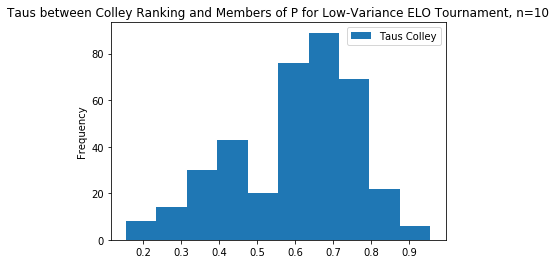

In [46]:
colley_ranks
P_sets_c
tausc = []
for k in range(len(colley_ranks)):
    #print(massey_ranks[k], end='         ')
    #print(P_sets[k])
    for o in range(len(list(P_sets[k]))):
        tausc.append(kendall_tau(massey_ranks[k], list(P_sets[k])[o]))
tausc
tauscdf = pd.DataFrame({"Taus Colley": tausc})
tauscdf.plot.hist("Taus Colley", title="Taus between Colley Ranking and Members of P for Low-Variance ELO Tournament, n=10")

             0
0     0.768421
1     0.757895
2     0.747368
3     0.726316
4     0.747368
...        ...
1139  0.768421
1140  0.789474
1141  0.768421
1142  0.747368
1143  0.800000

[1144 rows x 1 columns]
       0
0    1.0
1    0.4
2    0.2
3    0.8
4    0.8
..   ...
174  1.0
175  0.8
176  0.6
177  0.2
178 -0.2

[179 rows x 1 columns]
       0
0    0.8
1    0.6
2    0.6
3    0.6
4    0.6
..   ...
197  0.0
198  0.4
199  0.2
200  0.6
201  0.8

[202 rows x 1 columns]
            0
0    0.244444
1    0.688889
2    0.333333
3    0.600000
4    0.688889
..        ...
292  0.822222
293  0.733333
294  0.555556
295  0.688889
296  0.733333

[297 rows x 1 columns]
            0
0    0.422222
1    0.511111
2    0.466667
3    0.377778
4    0.422222
..        ...
372  0.555556
373  0.600000
374  0.644444
375  0.644444
376  0.600000

[377 rows x 1 columns]
            0
0    0.789474
1    0.789474
2    0.747368
3    0.715789
4    0.778947
..        ...
989  0.621053
990  0.631579
991  0.621053
992  0.

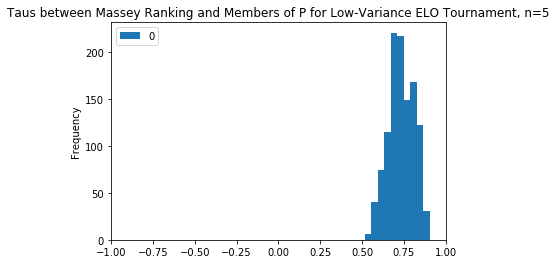

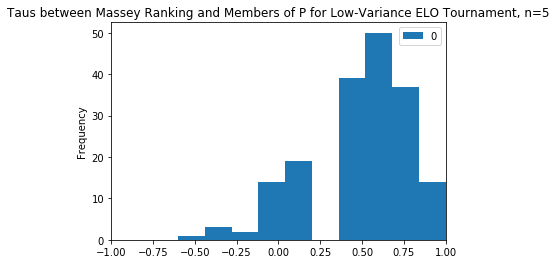

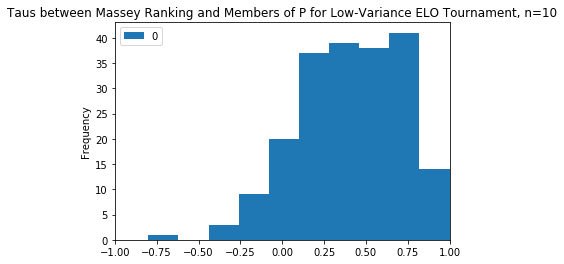

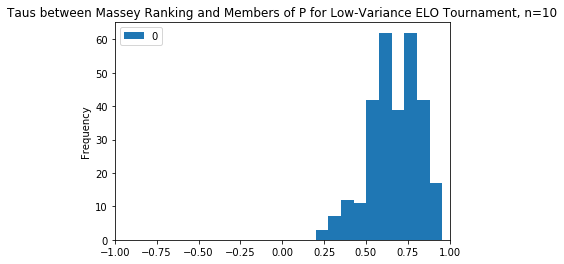

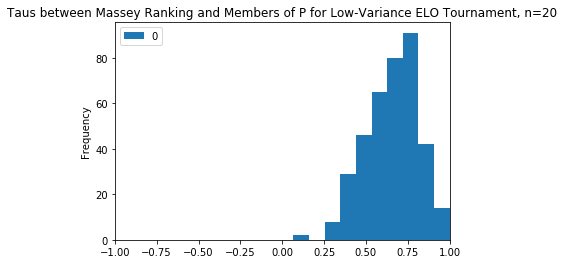

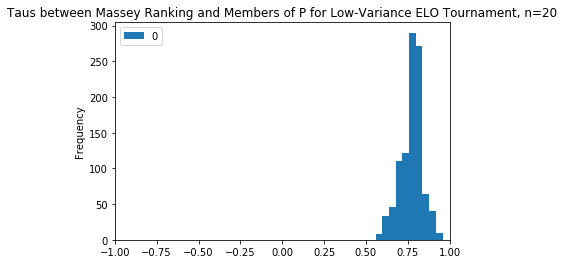

In [50]:
taus = {}
i = 0
for j in massey_ranks.keys():
    taus[j] = pd.read_csv("./rankdata/taudf" + str(i) + ".csv")['0']
    i += 1

#tausdf = pd.DataFrame(taus)
#tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10")
taus
tausdfs = []
for q in taus.keys():
    tausdf = pd.DataFrame(taus[q])
    print(tausdf)
    if "small" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=5", xlim=(-1,1))
    elif "big" in q:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=20", xlim=(-1,1))
    else:
        tausdf.plot.hist("Taus", title="Taus between Massey Ranking and Members of P for Low-Variance ELO Tournament, n=10", xlim=(-1,1)) 
    taudfs.append(tausdf)

In [49]:
pd.read_csv("./rankdata/taudf1.csv")['0']

0      1.0
1      0.4
2      0.2
3      0.8
4      0.8
      ... 
174    1.0
175    0.8
176    0.6
177    0.2
178   -0.2
Name: 0, Length: 179, dtype: float64